### data wrangling m data m se missing values ko deal krty hain 

basically data ko deal krna


#### Data wrangling is the process of cleaning, transforming and organizing data so that it can used for analysis and visualization. It is an important step in the data analysis process because raw data is often incomplete,incosistent and in an unstructured format which can make it difficult to work with.

   --> Data wrangling helps to make the data more consistent,accurate and useful for analysis and decision making.

## steps 
1. gathering data (kia)
2. tools to clean data libraries (kis ko clean krna hai)
3. How to do(steps)
   1. Dealing with missing values
   2. Correcting errors in a data
      1. Outliers Removal
         1. visualization (ye krloo )
         2. IQR  (ye krloo )
         3. Z - Score
   3. Droping duplicates (same infoo kii 2 rows hooon toh)
   4. Transforming the data
      1. Normalize the data (Data normalization)
         1. Min max normalization / Scaling (ye krloo ) 
         2. Standard Scaler (ye krloo )
         3. Log Transformation  (ye krloo )
         4. Winsorization 
         5. Z-score normalization 
         6. Decimal Scaling 
   5. Organizing Data 
      1. Columns creation 
      2. Renaming jis ki sense banay 

In [246]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [247]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [248]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [249]:
df.isnull().sum() * 100 /len (df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [250]:
df.drop(columns = 'deck',inplace= True)

In [251]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [252]:
df ['age'] = df.age.fillna(value= df ['age'].mean())

In [253]:
df ['embarked'] = df.embarked.fillna(value= df ['embarked'].mode()[0])

In [254]:
df ['embark_town'] = df.embark_town.fillna(value= df ['embark_town'].mode()[0])

In [255]:
df.isnull().sum() * 100 /len (df)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

#### opr sarii null values remove hogai hain

## OUTLIERS REMOVAL 

# VISUALIZATION METHOD

<AxesSubplot:xlabel='sex', ylabel='age'>

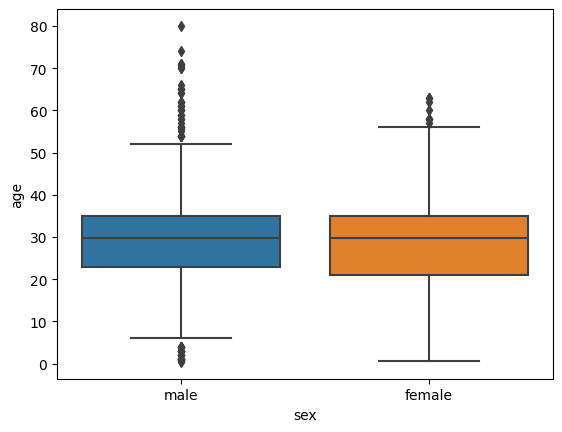

In [256]:
import seaborn as sns
sns.boxplot(x = 'sex' , y  = 'age',data= df)
# ye lines se opr wali sarii outliers hain 

# IQR METHOD

In [257]:
Q1 = df['age'].quantile (0.25)
Q3 = df['age'].quantile (0.75)
IQR = Q3 - Q1
IQR


13.0

In [258]:
lowerbound = Q1  - 1.5 * IQR
upperbound = Q3  + 1.5 * IQR

df = df[(df['age'] > lowerbound ) & (df['age'] < upperbound) ]

In [259]:
df.shape

(825, 14)

In [260]:
Q1 = df['fare'].quantile (0.25)
Q3 = df['fare'].quantile (0.75)
IQR = Q3 - Q1
IQR
lowerbound = Q1  - 1.5 * IQR
upperbound = Q3  + 1.5 * IQR

df = df[(df['fare'] > lowerbound ) & (df['fare'] < upperbound) ]

In [261]:
df.shape

(718, 14)

# Z SCORE METHOD 

In [262]:
from scipy import stats
import numpy as np


In [263]:
z_scores = np.abs(stats.zscore(df['age']))

# define a threshold for identifying outliers (e.g. any data point with a Z-score greater than 2)
threshold = 2

# identify outliers by checking if the absolute Z-score is greater than the threshold
outliers = df[np.abs(z_scores) > threshold]

# remove outliers from the dataset
df = df[np.abs(z_scores) <= threshold]

In [264]:
df.shape

(663, 14)

#  FINDING AND DROPPING DUPLICATES

In [265]:
df.shape

(663, 14)

In [266]:
# finding duplicates 
df.duplicated().sum()

102

In [267]:
# kahan kahan pr duplicates hain agar ye dikhna hai toh 
df_duplicates = df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


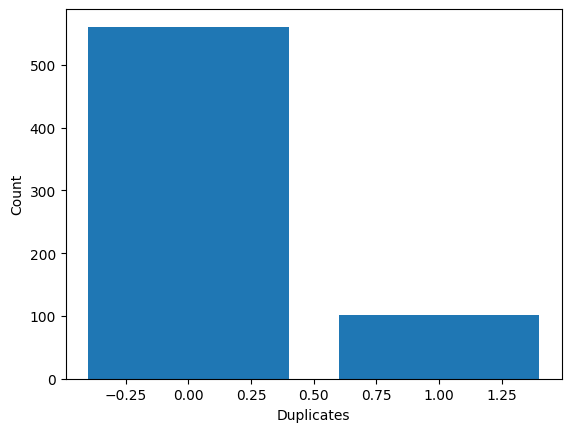

In [268]:
df_duplicates = df.duplicated()
df_duplicates_count  = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index,df_duplicates_count.values)
plt.xlabel('Duplicates')
plt.ylabel('Count')
plt.show()

In [269]:
# dropping duplicates
df.drop_duplicates(inplace= True)

In [270]:
df.shape

(561, 14)

In [129]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


# DATA NORMALIZATION 
To bring data at one scale

In [131]:
# pip install scikit-learn

In [271]:
# 1 import libararies
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2 data
df

# 3 select columns to normalize
cols_to_normalize = ['age','fare']

# 4 create the scaler function / tool
scaler = MinMaxScaler()

# 5 fit and transform the data on scaler or vice versa 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6 Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.333333,1,0,0.118512,S,Third,man,True,Southampton,no,False
2,1,3,female,0.435897,0,0,0.129546,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.666667,1,0,0.868002,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.666667,0,0,0.131590,S,Third,man,True,Southampton,no,True
5,0,3,male,0.530747,0,0,0.138264,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.769231,0,5,0.476093,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.256410,0,0,0.490396,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.530747,1,2,0.383327,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.435897,0,0,0.490396,C,First,man,True,Cherbourg,yes,True


In [134]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,0.344029,2.490196,0.501473,0.395722,0.324421,0.287860
std,0.475474,0.737026,0.218758,0.792994,0.826952,0.217598
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.333333,0.000000,0.000000,0.128798
50%,0.000000,3.000000,0.530747,0.000000,0.000000,0.206784
75%,1.000000,3.000000,0.615385,1.000000,0.000000,0.425010
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [161]:
# 1 import libararies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2 data
df

# 3 select columns to normalize
cols_to_normalize = ['age','fare']

# 4 create the scaler function / tool
scaler = StandardScaler()

# 5 fit and transform the data on scaler or vice versa 
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6 Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.769294,1,0,-0.778951,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.300028,0,0,-0.728198,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.755819,1,0,2.668491,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.755819,0,0,-0.718799,S,Third,man,True,Southampton,no,True
5,0,3,male,0.133939,0,0,-0.688099,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,1.225085,0,5,0.865821,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-1.121243,0,0,0.931612,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.133939,1,2,0.439120,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.300028,0,0,0.931612,C,First,man,True,Cherbourg,yes,True


#### standard mai mean and standard deviation ka role hota hai 
==> agar apka data normalize hai phelii baat matlab uskii balgraph ban rhi hai aur phr uskay baad usme se mean k sath -ve krty hain and divide krty standard deviation data k \
==> aur iskii range -3 se +3 k bech hoti hai 

x_stand = (x - mean (x)) / std(x)

where, 
x_stand is the standard deviation \
x is the org variable \
mean(x) is the mean of the variable x \
std(x) is the standard deviation of variable x 

In [162]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,561.000000,561.000000,5.610000e+02,561.000000,561.000000,5.610000e+02
mean,0.344029,2.490196,4.337984e-16,0.395722,0.324421,4.432976e-17
std,0.475474,0.737026,1.000892e+00,0.792994,0.826952,1.000892e+00
min,0.000000,1.000000,-2.294407e+00,0.000000,0.000000,-1.324075e+00
25%,0.000000,2.000000,-7.692938e-01,0.000000,0.000000,-7.316415e-01
50%,0.000000,3.000000,1.339389e-01,0.000000,0.000000,-3.729271e-01
75%,1.000000,3.000000,5.211865e-01,1.000000,0.000000,6.308535e-01
max,1.000000,3.000000,2.280932e+00,5.000000,6.000000,3.275646e+00


# Log Transformation

In [215]:
khasti = sns.load_dataset('titanic')
khasti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [216]:
khasti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### agar 0 k khareeb km value h toh is tarha hoga log

In [225]:
import numpy as np
khasti['age'] = khasti['age'].fillna(khasti['age'].median())
khasti['fare'] = khasti['fare'].fillna(khasti['fare'].median())
# log lenay se value choty scale pr ajatii hain ye range banata hai 
# log transform
khasti['age'] = np.log(khasti['age'])
khasti['fare'] = np.log(khasti['fare'])
khasti.head()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1.128508,1,0,0.683603,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1.291320,1,0,1.450832,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,1.181143,0,0,0.727559,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1.268453,1,0,1.379314,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,1.268453,0,0,0.735091,S,Third,man,True,NaN,Southampton,no,True


### agar 0 k khareeb ziyada value h toh is tarha hoga log

np.log1p

<AxesSubplot:xlabel='sex', ylabel='fare'>

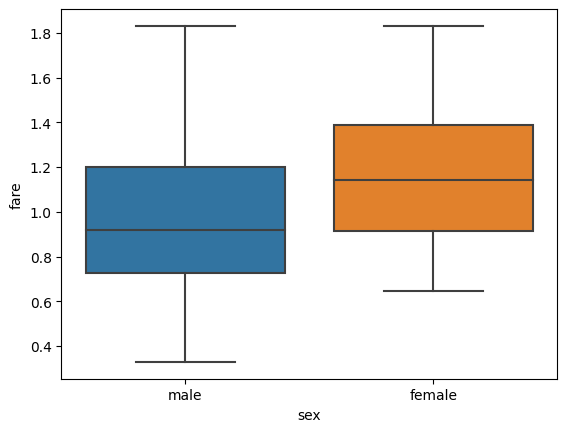

In [226]:
sns.boxplot(data = khasti, x = 'sex', y = 'fare')

In [228]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# ORGANIZING THE DATA

In [237]:
df['family_size']  = df ['sibsp'] + df['parch'] 

In [233]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwar

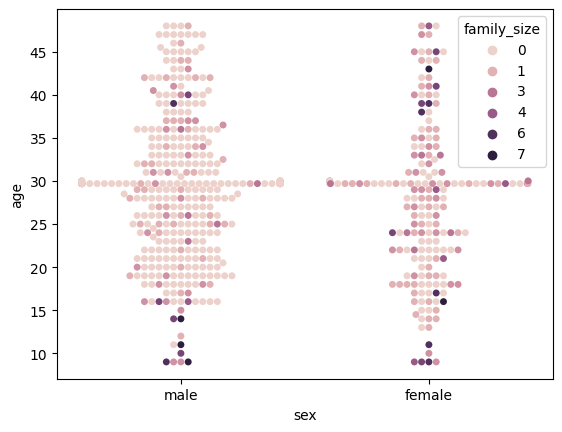

In [239]:
sns.swarmplot(x = 'sex', y = 'age',hue = 'family_size', data = df)

In [241]:
df = df.rename (columns= {'survived' : 'survival'})

In [242]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [243]:
table  = pd.pivot_table(df, values= 'fare', index= 'pclass',
columns = 'survival' , aggfunc = np.sum)
table

survival,0,1
pclass,,
1,1156.8165,1899.7419
2,1151.6208,1151.7625
3,3429.5913,1089.5792


<AxesSubplot:xlabel='fare', ylabel='age'>

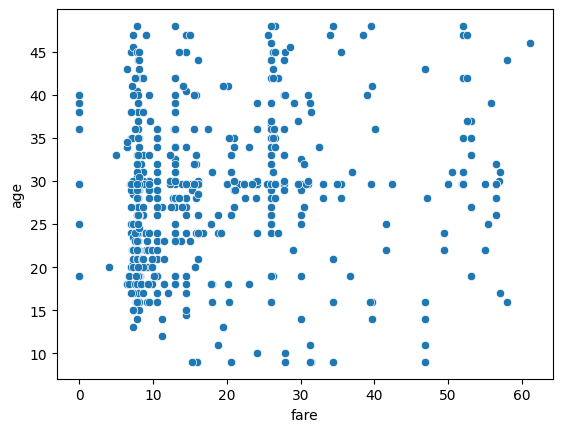

In [244]:
sns.scatterplot(x = 'fare', y = 'age', data = df)

In [272]:
df['family_size']  = df ['sibsp'] + df['parch'] 

In [273]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.333333,1,0,0.118512,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.435897,0,0,0.129546,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.666667,1,0,0.868002,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.666667,0,0,0.131590,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.530747,0,0,0.138264,Q,Third,man,True,Queenstown,no,True,0


# SAVING THE WRANGLED DATA

In [274]:
df.to_csv('preprocessed_data.csv')